In [129]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [130]:
df = pd.read_csv('/content/DELL.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-01,21.777945,22.993132,21.693752,22.440264,21.538488,13801490
1,2017-12-04,22.504812,22.521650,20.952852,21.017401,20.172800,8513645
2,2017-12-05,20.927595,21.278399,20.644144,20.899530,20.059671,6129126
3,2017-12-06,20.767628,21.182980,20.697468,21.065109,20.218594,7828790
4,2017-12-07,21.278399,21.601139,21.205433,21.298044,20.442167,7163534
...,...,...,...,...,...,...,...
1386,2023-06-07,46.860001,47.779999,46.770000,47.660000,47.660000,4096000
1387,2023-06-08,47.990002,48.099998,47.200001,47.889999,47.889999,3976100
1388,2023-06-09,48.090000,48.669998,47.590000,47.610001,47.610001,3293500
1389,2023-06-12,47.720001,48.119999,47.619999,48.070000,48.070000,3596800


In [131]:
# Extract the input features (X) and the target variable (y)
X = df[['Open', 'High', 'Low', 'Adj Close', 'Volume']].values
y = df['Close'].values

In [132]:
train_s = int(X.shape[0]*0.5)
test_s = int(X.shape[0]*0.3)
val_s = int(X.shape[0]*0.2)

In [133]:
X_train = X[0:train_s, :]
X_test = X[train_s:train_s+test_s,:]
X_val = X[train_s+test_s:train_s+test_s+val_s,:]

In [134]:
y_train = y[ 0:train_s]
y_test = y[train_s:train_s+test_s]
y_val = y[train_s+test_s:train_s+test_s+val_s]

In [135]:
model = GradientBoostingRegressor(max_depth=4, n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, random_state=42)

In [136]:
error = [mean_squared_error(y_test,y_pred) for y_pred in model.staged_predict(X_test)]
best_samples_estimators = np.argmin(error)

In [137]:
model = GradientBoostingRegressor(max_depth=4, n_estimators=best_samples_estimators, learning_rate=0.1, random_state=42)

# preTrain the model on the training set
model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=95, random_state=42)

In [138]:
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

In [139]:
# Tính RMSE, MAE, MAPE
valid_rmse = np.sqrt(np.mean((y_val_pred - y_val)**2))
test_rmse = np.sqrt(np.mean((y_test_pred - y_test)**2))
valid_mae = np.mean(np.abs(y_val_pred - y_val))
test_mae = np.mean(np.abs(y_test_pred - y_test))
valid_mape = np.mean(np.abs((y_val_pred - y_val) / y_val))
test_mape = np.mean(np.abs((y_test_pred - y_test) / y_test))

print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 7.994337718141056
Testing RMSE: 14.421323179638035
Validation MAE: 6.99079662648569
Testing MAE: 12.171592535335906
Validation MAPE: 0.15808528436850755
Testing MAPE: 0.23419911017625028


In [140]:
print("R2 score",model.score(X_train, y_train))

R2 score 0.9999933403782022


In [141]:
next_day_features = (df[['Open', 'High', 'Low', 'Adj Close', 'Volume']].iloc[-1]).values.reshape(1, -1)

In [142]:
predictions = []
for _ in range(30):
    next_day_prediction = model.predict(next_day_features)
    predictions.append(next_day_prediction)
    next_day_features[0, :-1] = next_day_features[0, 1:]
    next_day_features[0, -1] = next_day_prediction

print("The next 30 days:\n", predictions)

The next 30 days:
 [array([35.36423076]), array([35.3666788]), array([35.3666788]), array([35.3666788]), array([35.36681385]), array([35.36681385]), array([35.36681385]), array([35.36681385]), array([35.36681385]), array([35.36681385]), array([35.36681385]), array([35.36681385]), array([35.36681385]), array([35.36681385]), array([35.36681385]), array([35.36681385]), array([35.36681385]), array([35.36681385]), array([35.36681385]), array([35.36681385]), array([35.36681385]), array([35.36681385]), array([35.36681385]), array([35.36681385]), array([35.36681385]), array([35.36681385]), array([35.36681385]), array([35.36681385]), array([35.36681385]), array([35.36681385])]


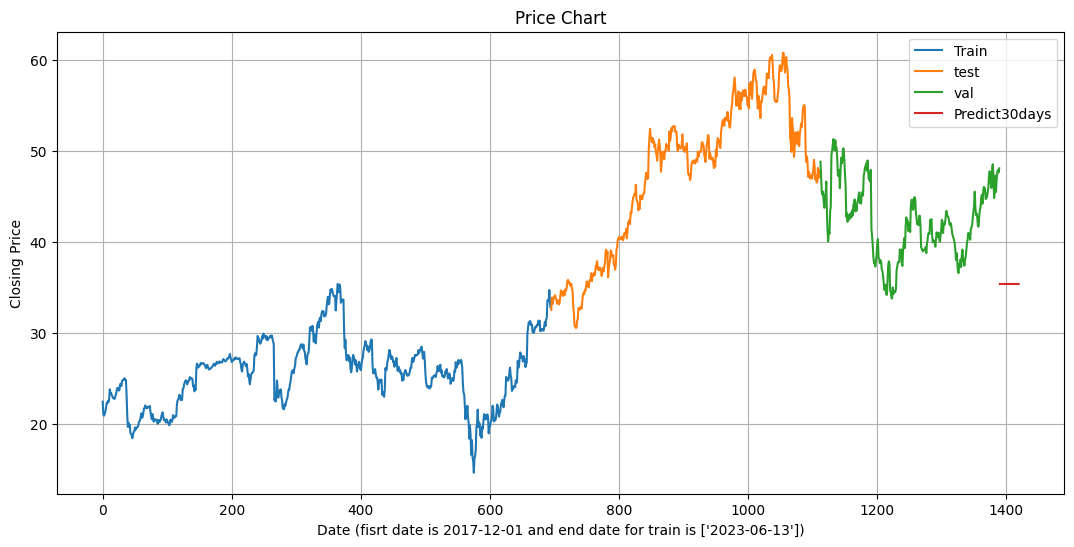

In [143]:
# Plot the price chart
plt.figure(figsize=(13, 6))
train = pd.RangeIndex(start=0, stop=train_s, step=1)
plt.plot(train,y_train)
test = pd.RangeIndex(start=train_s, stop=train_s+test_s, step=1)
plt.plot(test,y_test)
val = pd.RangeIndex(start=train_s+test_s, stop=train_s+test_s+val_s, step=1)
plt.plot(val,y_val)
test_data_index = pd.RangeIndex(start=train_s+test_s+val_s, stop=train_s+test_s+val_s+30, step=1)
plt.plot(test_data_index,predictions)
plt.xlabel('Date (fisrt date is {0} and end date for train is {1})'.format(df['Date'][0],df['Date'][-1:,].values))
plt.ylabel('Closing Price')
plt.title('Price Chart')
plt.grid(True)
plt.legend(['Train','test','val','Predict30days'])
plt.show()